In [1]:
import pandas as pd
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cluster_results = pd.read_csv(
    "../clustering_results/hurst_clustering_result_Finance.csv"
)

In [2]:
sector = "Finance"

In [3]:
csv_file_paths = glob.glob("../stock_data_model/Finance/*.csv")
end_date = "2024-06-20"
start_date = "2023-12-20"
stock_fig_dir = "../stock_figure_hurst_4"


def get_golden_length(start_date, end_date, sector):
    if sector == "Finance":
        csv_file_path = os.path.join(f"../stock_data_model/", sector, "AAME.csv")
    else:
        csv_file_path = os.path.join(f"../stock_data_model/", sector, "AAPL.csv")
    data = pd.read_csv(csv_file_path)
    filtered_data = data[(data["Date"] >= start_date) & (data["Date"] <= end_date)][
        ["Close"]
    ]
    date_range = data[(data["Date"] >= start_date) & (data["Date"] <= end_date)][
        ["Date"]
    ]
    return filtered_data.shape, date_range


golden_shape, date_range = get_golden_length(start_date, end_date, sector)

In [4]:
def standardize_data(data):
    """Standardize the data."""
    normalized_data = pd.DataFrame(
        StandardScaler().fit_transform(data[["Close"]]), columns=["Close"]
    )
    # print(f'normalized_data.shape = {normalized_data.values.shape}, normalized_data = {normalized_data.values}')
    normalized_data['Date'] = data["Date"]
    # print(f'normalized_data.shape = {normalized_data.values.shape}, normalized_data = {normalized_data.values}')
    return normalized_data

In [5]:
def read_and_filter_data(csv_file_path, start_date, end_date, golden_shape):
    """Read CSV file and filter data based on date range."""
    # logging.info(f'Reading and filtering data from {csv_file_path}')
    data = pd.read_csv(csv_file_path)
    
    filtered_data = data[(data["Date"] >= start_date) & (data["Date"] <= end_date)][
        ["Date","Close"]
    ]
    # print(f'filtered_data.shape = {filtered_data.values.shape}, filtered_data = {filtered_data.values}')
    filtered_data = standardize_data(filtered_data)["Close"]
    # print(f'filtered_data.shape = {filtered_data.shape}, filtered_data = {filtered_data}')
    required_length = golden_shape[0]
    # 检查长度并填补0
    if len(filtered_data) < required_length:
        print(f"filtered_data.shape = {filtered_data.shape}")
        fill_length = required_length - len(filtered_data)
        fill_zeros = pd.DataFrame({"Close": [0] * fill_length})
        filtered_data = pd.concat(
            [fill_zeros, filtered_data], axis=0, ignore_index=True
        )
    return filtered_data.values.reshape(-1)

In [25]:
stockID = "AAME"
data = pd.read_csv(f"../stock_data_model/Finance/{stockID}.csv")
normalized_data = pd.DataFrame(MinMaxScaler().fit_transform(data[["Close"]]))
data = pd.concat([data["Date"], normalized_data], axis=1)

In [7]:
cluster_results["clusterID"].unique()

array([1, 2, 0], dtype=int64)

In [8]:
for stockID in cluster_results["stockID"]:
    cluster_id = cluster_results.loc[
        cluster_results["stockID"] == stockID, "clusterID"
    ].values[0]
    H = cluster_results.loc[
        cluster_results["stockID"] == stockID, "hurst exponent"
    ].values[0]
    data = read_and_filter_data(
        f"../stock_data_model/Finance/{stockID}.csv",
        start_date,
        end_date,
        golden_shape,
    )
    # X.append(data)
    # print(X.shape)
    # Plot the 'Close' column
    plt.figure(figsize=(10, 6))
    # Column 3 corresponds to 'Close'
    # print(f"date_range = {date_range}, close = {standardized_data[:, 3]}")
    # print(date_range.to_numpy().shape)
    # print(standardized_data[:, 3].shape)
    plt.plot(date_range.to_numpy().reshape(-1), np.array(data).tolist())
    plt.xlabel("Date")
    plt.ylabel("Standardized Close Value")
    plt.title(
        f"Standardized Close Prices for stockID = {stockID} cluster: {cluster_id}, H = {H:.2f}"
    )
    # Set date format on x-axis to make it less dense
    plt.gca().xaxis.set_major_locator(
        mdates.MonthLocator(interval=1)
    )  # Show every second week
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(stock_fig_dir, sector, f"{stockID}_{cluster_id}.jpg"))
    plt.close()
# X = np.array(X)
# X = np.sum(X, axis=0) / X.shape[0]

c:\Users\USER\anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


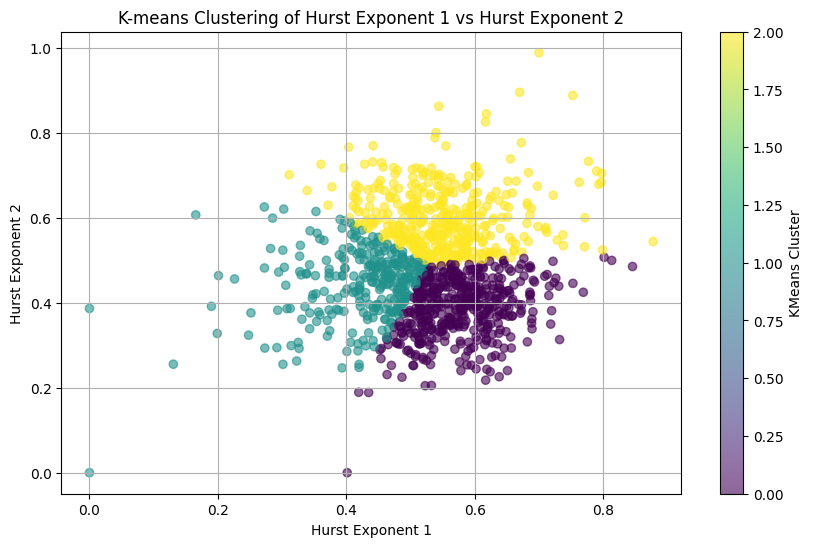

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 載入數據
file_path = '../clustering_results/hurst_clustering_result_Finance.csv'  # 替換為您的文件路徑
data = pd.read_csv(file_path)

# K-means 聚類
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['KMeans_cluster'] = kmeans.fit_predict(data[['hurst exponent_1', 'hurst exponent_2']])

# 保存結果到 CSV 文件
output_file_path = '../clustering_results/hurst_clustering_kmeans_result.csv'  # 替換為您的輸出文件路徑
data.to_csv(output_file_path, index=False)

# 視覺化 K-means 聚類結果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['hurst exponent_1'], data['hurst exponent_2'], c=data['KMeans_cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='KMeans Cluster')
plt.xlabel('Hurst Exponent 1')
plt.ylabel('Hurst Exponent 2')
plt.title('K-means Clustering of Hurst Exponent 1 vs Hurst Exponent 2')
plt.grid(True)
plt.show()

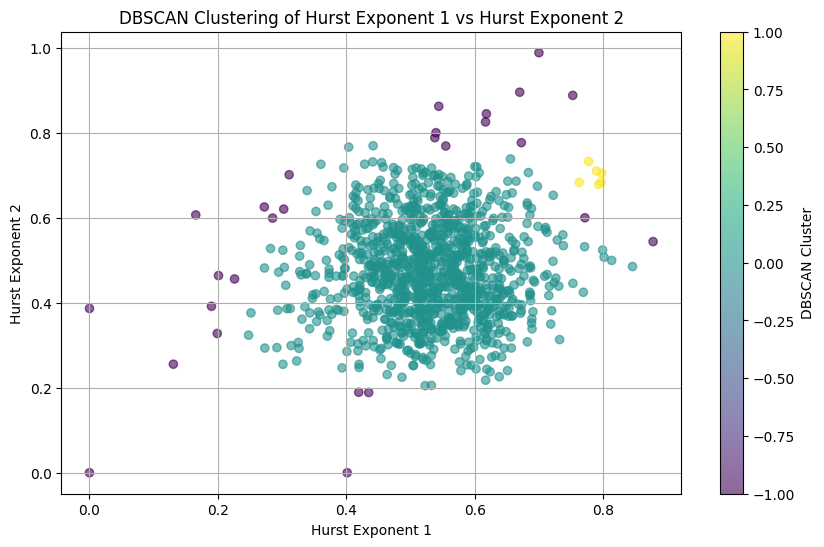

In [12]:
from sklearn.cluster import DBSCAN

# DBSCAN 聚類
dbscan = DBSCAN(eps=0.05, min_samples=5)
data['DBSCAN_cluster'] = dbscan.fit_predict(data[['hurst exponent_1', 'hurst exponent_2']])

# 視覺化 DBSCAN 聚類結果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['hurst exponent_1'], data['hurst exponent_2'], c=data['DBSCAN_cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='DBSCAN Cluster')
plt.xlabel('Hurst Exponent 1')
plt.ylabel('Hurst Exponent 2')
plt.title('DBSCAN Clustering of Hurst Exponent 1 vs Hurst Exponent 2')
plt.grid(True)
plt.show()

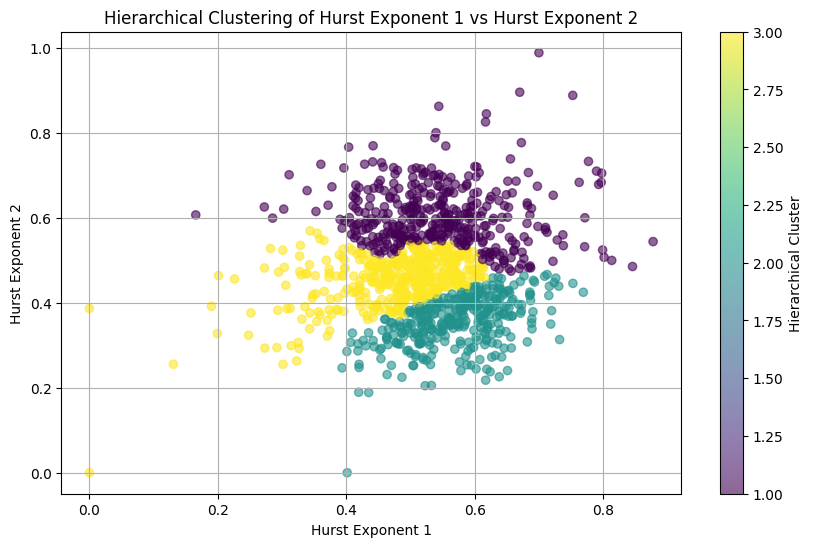

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# 層次聚類
Z = linkage(data[['hurst exponent_1', 'hurst exponent_2']], method='ward')
data['Hierarchical_cluster'] = fcluster(Z, t=3, criterion='maxclust')

# 視覺化層次聚類結果
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['hurst exponent_1'], data['hurst exponent_2'], c=data['Hierarchical_cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Hierarchical Cluster')
plt.xlabel('Hurst Exponent 1')
plt.ylabel('Hurst Exponent 2')
plt.title('Hierarchical Clustering of Hurst Exponent 1 vs Hurst Exponent 2')
plt.grid(True)
plt.show()

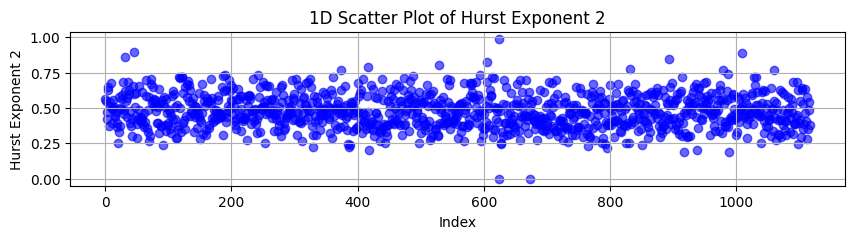

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 載入數據
# file_path = 'hurst_exponent_data.csv'  # 替換為您的文件路徑
# data = pd.read_csv(file_path)

# 畫一維散點圖
plt.figure(figsize=(10, 2))
plt.scatter(range(len(data)), data['hurst exponent_2'], c='blue', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Hurst Exponent 2')
plt.title('1D Scatter Plot of Hurst Exponent 2')
plt.grid(True)
plt.show()